In [2]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns

# Carregando predições

In [3]:
PRED_PATH = "/home/kenzosaki/mestrado/data/VICTOR/svm_preds.csv"

In [10]:
preds_df = pd.read_csv(PRED_PATH)

In [11]:
print(classification_report(preds_df["document_type"], preds_df["prediction"]))

                                  precision    recall  f1-score   support

agravo_em_recurso_extraordinario       1.00      1.00      1.00         2
                          outros       1.00      0.99      0.99        91
                   peticao_do_RE       0.80      1.00      0.89         4
                        sentenca       1.00      1.00      1.00         3

                        accuracy                           0.99       100
                       macro avg       0.95      1.00      0.97       100
                    weighted avg       0.99      0.99      0.99       100



# Gerando a matriz de confusão para as predições

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
%matplotlib inline

In [14]:
label_encoder = LabelEncoder()
preds_df["document_type"] = label_encoder.fit_transform(preds_df["document_type"])
preds_df["prediction"] = label_encoder.fit_transform(preds_df["prediction"])

In [15]:
c_matrix = confusion_matrix(preds_df["document_type"], preds_df["prediction"])

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=label_encoder.classes_)

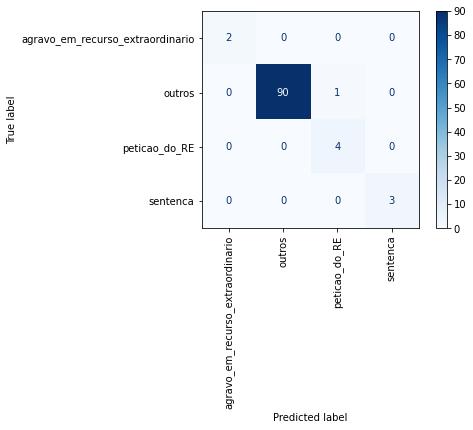

In [23]:
disp.plot(xticks_rotation="vertical", cmap="Blues")